# Strassen Multiplication Lab

In [171]:
import numpy as np
import timeit
import matplotlib
import matplotlib.pyplot as plt
from tabulate import tabulate

### Helper Method definitions

In [56]:
def random_matrix(size):
    return np.random.randint(-10, 10, (2 ** size, 2 ** size))

In [57]:
def naive_multiply(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Incompatible Multiplication")
    c = np.zeros((len(A), len(B[0])))
    for i in range(len(A)):
        for j in range(len(B[0])):
            sum = 0
            for k in range(len(A[0])):
                sum += A[i][k] * B[k][j]
            c[i, j] = sum
    return c

In [58]:
#A is len(A) by len(A[0])
def strassen_multiply(A, B):
    if len(A) <= 4:
        return A @ B
    if len(A[0]) != len(B):
        raise ValueError("Incompatible Multiplication")
    A11 = A[:len(A) // 2, :len(A[0]) // 2]
    A12 = A[:len(A) // 2, len(A[0]) // 2:]
    A21 = A[len(A) // 2:, :len(A[0]) // 2]
    A22 = A[len(A) // 2:, len(A[0]) // 2:]
    B11 = B[:len(B) // 2, :len(B[0]) // 2]
    B12 = B[:len(B) // 2, len(B[0]) // 2:]
    B21 = B[len(B) // 2:, :len(B[0]) // 2]
    B22 = B[len(B) // 2:, len(B[0]) // 2:]
    M1 = strassen_multiply(A11 + A22, B11 + B22)
    M2 = strassen_multiply(A21 + A22, B11)
    M3 = strassen_multiply(A11, B12 - B22)
    M4 = strassen_multiply(A22, B21 - B11)
    M5 = strassen_multiply(A11 + A12, B22)
    M6 = strassen_multiply(A21 - A11, B11 + B12)
    M7 = strassen_multiply(A12 - A22, B21 + B22)
    return np.vstack([np.hstack([M1 + M4 - M5 + M7, M3 + M5]), np.hstack([M2 + M4, M1 - M2 + M3 + M6])])
    

In [59]:
#https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm#Non-square_matrices
#Modified Version for non square matrices (Uses 2 splits instead of 4)
def non_square_multiply(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Incompatible Multiplication")
    n = len(A)
    m = len(A[0])
    p = len(B[0])
    val = max(n, m, p)
    if val <= 4:
        return A @ B

    if val == n:
        #A is split horizontally
        A1 = A[ : len(A) // 2, : ]
        A2 = A[len(A) // 2 : , : ]
        C1 = non_square_multiply(A1, B)
        C2 = non_square_multiply(A2, B)
        return np.vstack([C1, C2])
    elif val == p:
        #B is split vertically
        B1 = B[ : , : len(B[0]) // 2]
        B2 = B[ : , len(B[0]) // 2 :]
        C1 = non_square_multiply(A, B1)
        C2 = non_square_multiply(A, B2)
        return np.hstack([C1, C2])
    else:
        #A is split vertically, B is split horizontally
        B1 = B[ : len(A) // 2, : ]
        B2 = B[len(A) // 2 : , : ]
        A1 = A[ : , : len(B[0]) // 2]
        A2 = A[ : , len(B[0]) // 2 :]
        C1 = non_square_multiply(A1, B1)
        C2 = non_square_multiply(A2, B2)
        return C1 + C2
A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
B = [
    [1, 2], 
    [3, 4], 
    [5, 6]
]
non_square_multiply(np.array(A), np.array(B))

array([[ 22,  28],
       [ 49,  64],
       [ 76, 100]])

### Testing

In [60]:
for i in range(7):
    print(i)
    A = random_matrix(i)
    A2 = A@A
    AA = naive_multiply(A, A)
    assert(np.array_equal(A2, AA))

0
1
2
3
4
5
6


In [61]:
for i in range(7):
    print(i)
    A = random_matrix(i)
    A2 = A@A
    AA = strassen_multiply(A, A)
    assert(np.array_equal(A2, AA))

0
1
2
3
4
5
6


In [62]:
for i in range(7):
    print(i)
    A = random_matrix(i)
    A2 = A@A
    AA = non_square_multiply(A, A)
    assert(np.array_equal(A2, AA))

0
1
2
3
4
5
6


### Timing and Plotting

In [147]:
upper = 10
x = range(1, upper + 1)
naive_y = []
strassen_y = []
np_y = []
nonsq_y = []
trials = 7

In [148]:
for size in x:
    print(size, "\n", end='   ')
    A = random_matrix(size)
    naive_y.append(timeit.timeit('naive_multiply(A, A); print(".", end=" ")', number=trials, globals = globals())/trials)
    print("n\n", end='   ')
    np_y.append(timeit.timeit('A@A; print(".", end=" ")', number=trials, globals = globals())/trials)
    print("p\n", end='   ')
    strassen_y.append(timeit.timeit('strassen_multiply(A, A); print(".", end=" ")', number=trials, globals = globals())/trials)
    print("s\n", end='   ')
    nonsq_y.append(timeit.timeit('non_square_multiply(A, A); print(".", end=" ")', number=trials, globals = globals())/trials)
    print("q\n", end='')
    
print("DONE")

1 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
2 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
3 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
4 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
5 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
6 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
7 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
8 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
9 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
10 
   . . . . . . . n
   . . . . . . . p
   . . . . . . . s
   . . . . . . . q
DONE


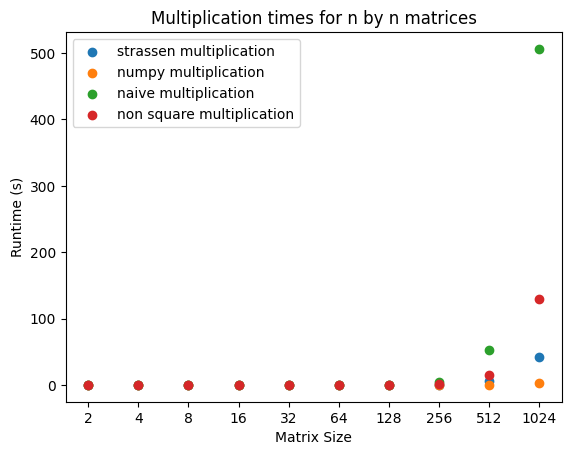

In [149]:
x_real = [2 ** i for i in x]

plt.title("Multiplication times for n by n matrices")
plt.xlabel("Matrix Size")
plt.ylabel("Runtime (s)")

plt.scatter(x, strassen_y, label='strassen multiplication')
plt.scatter(x, np_y, label='numpy multiplication')
plt.scatter(x, naive_y, label='naive multiplication')
plt.scatter(x, nonsq_y, label='non square multiplication')

plt.xticks(x, x_real)
plt.legend()
plt.show()

### Log-Log Regression

In [150]:
ln_x = [np.log(2 ** i) for i in x]
ln_naive = [np.log(i) for i in naive_y]
ln_np = [np.log(i) for i in np_y]
ln_strassen = [np.log(i) for i in strassen_y]
ln_nonsq = [np.log(i) for i in nonsq_y]

In [151]:
n0, n1 = np.polyfit(ln_x, ln_naive, 1)
nk = n0
nc = np.exp(n1)
s0, s1 = np.polyfit(ln_x, ln_strassen, 1)
sk = s0
sc = np.exp(s1)
p0, p1 = np.polyfit(ln_x, ln_np, 1)
pk = p0
pc = np.exp(p1)
q0, q1 = np.polyfit(ln_x, ln_nonsq, 1)
qk = n0
qc = np.exp(q1)

In [152]:
ln_n_pred = n0 * np.array(ln_x) + n1
ln_s_pred = s0 * np.array(ln_x) + s1
ln_p_pred = p0 * np.array(ln_x) + p1
ln_q_pred = q0 * np.array(ln_x) + q1

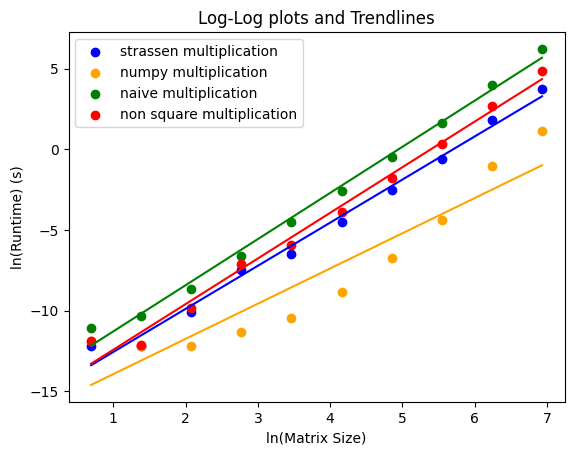

In [153]:
plt.title("Log-Log plots and Trendlines")
plt.xlabel("ln(Matrix Size)")
plt.ylabel("ln(Runtime) (s)")

plt.scatter(ln_x, ln_strassen, label='strassen multiplication', color='blue')
plt.plot(ln_x, ln_s_pred, color='blue')
plt.scatter(ln_x, ln_np, label='numpy multiplication', color='orange')
plt.plot(ln_x, ln_p_pred, color='orange')
plt.scatter(ln_x, ln_naive, label='naive multiplication', color='green')
plt.plot(ln_x, ln_n_pred, color='green')
plt.scatter(ln_x, ln_nonsq, label='non square multiplication', color='red')
plt.plot(ln_x, ln_q_pred, color='red')

plt.legend()
plt.show()

### Polynomial Trendline and Equations

In [157]:
n_pred = nc * (x_real ** nk)
s_pred = sc * (x_real ** sk)
p_pred = pc * (x_real ** pk)
q_pred = qc * (x_real ** qk)

"""
#approximate calculation for runtime
num = 0
for size in range(1, upper + 1):
    i = 2 ** size
    num += trials * (nc * (i ** nk) + sc * (i ** sk) + qc * (i ** qk) + pc * (i ** pk))
print(num)
#""";

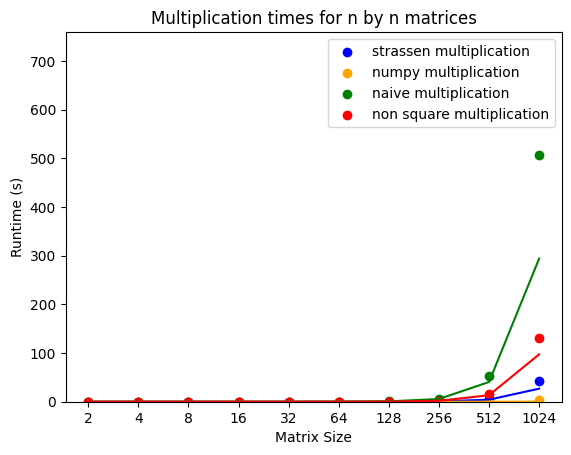

In [158]:
plt.title("Multiplication times for n by n matrices")
plt.xlabel("Matrix Size")
plt.ylabel("Runtime (s)")

plt.plot(x, s_pred, color='blue')
plt.scatter(x, strassen_y, label='strassen multiplication', color='blue')
plt.plot(x, p_pred, color='orange')
plt.scatter(x, np_y, label='numpy multiplication', color='orange')
plt.plot(x, n_pred, color='green')
plt.scatter(x, naive_y, label='naive multiplication', color='green')
plt.plot(x, q_pred, color='red')
plt.scatter(x, nonsq_y, label='non square multiplication', color='red')


plt.xticks(x, x_real)
plt.ylim(np_y[0]-0.001, naive_y[-1] * 1.5)
plt.legend()
plt.show()

In [159]:
print(f"Equation for Naive: {nc:.2e}x^{nk:.2f}")
print(f"Equation for Non Square: {qc:.2e}x^{qk:.2f}")
print(f"Equation for Strassen's: {sc:.2e}x^{sk:.2f}")
print(f"Equation for Numpy: {pc:.2e}x^{pk:.2f}")

Equation for Naive: 7.24e-07x^2.86
Equation for Non Square: 2.40e-07x^2.86
Equation for Strassen's: 2.44e-07x^2.67
Equation for Numpy: 1.01e-07x^2.18


### Table

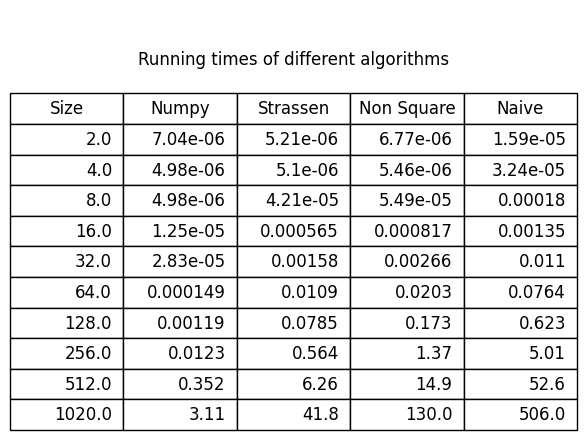

In [205]:
def round(n):
    return str(float('%.3g' % n))

def form(arr):
    return [round(i) for i in arr]

text = np.array([form(x_real), form(np_y), form(strassen_y), form(nonsq_y), form(naive_y)]).T
headers = ["Size", "Numpy", "Strassen", "Non Square", "Naive"]

fig, ax = plt.subplots()
fig.patch.set_visible(False)
fig.tight_layout()
ax.axis('off')
ax.axis('tight')
ax.set_title("Running times of different algorithms", y=0.85)

table = ax.table(text, colLabels=headers, loc='center', bbox=[0, 0, 1, 0.8])
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.show()

## Conclusion

The Numpy multiplication is by far the fastest, and the naive implementation is much slower than the other three. The regular strassen algorithm works faster than the modified one for non-square matrices, because the recursive cases are much smaller on each step. The time complexity of the Strassen Algorithm was $\mathcal{O}(n^{2.67})$, a significant improvement from the naive implementation ($\mathcal{O}(n^{2.86})$). Both the modified Strassen and Naive implementation had the same time complexity, although the constant factor in the naive implementation was much higher. Numpy was the best algorithm of the four, with a complexity of  $\mathcal{O}(n^{2.18})$.